##                                                   Kaggle-Telstra-Network-Disruptions  

The goal of the this competition is to predict Telstra network's fault severity at a time at a particular location based on the log data available. This is a multi-class problem where Fault severity has 3 categories: 

0 ----> no fault

1 ----> few

2 ----> many



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 4
%matplotlib inline

## Loading the data

There are 6 tables in total

In [2]:
train = pd.read_csv('data/train.csv') 
test = pd.read_csv('data/test.csv')

event_type = pd.read_csv('data/event_type.csv')
severity_type = pd.read_csv('data/severity_type.csv')
log_feature = pd.read_csv('data/log_feature.csv')
resource_type = pd.read_csv('data/resource_type.csv')

##  Exploratory Data Analysis on the tables

## Train Table

In [3]:
print train.shape 
print ''
print train.describe() 
print ''
print train.describe(include=['object']) # location have been repeated   929 unique locations
print ''
train.head()

(7381, 3)

                 id  fault_severity
count   7381.000000      7381.00000
mean    9264.649099         0.45021
std     5349.290176         0.66656
min        1.000000         0.00000
25%     4647.000000         0.00000
50%     9222.000000         0.00000
75%    13885.000000         1.00000
max    18550.000000         2.00000

            location
count           7381
unique           929
top     location 821
freq              85



,id,location,fault_severity
0,14121,location 118,1
1,9320,location 91,0
2,14394,location 152,1
3,8218,location 931,1
4,14804,location 120,0


## Distribution of Fault Severity in the train data

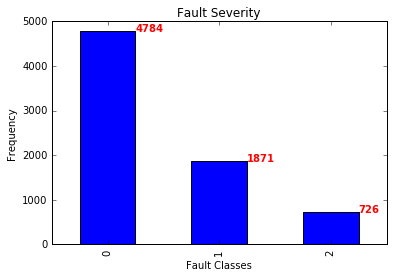

In [4]:
bplot_fault = train.fault_severity.value_counts().plot(kind= 'bar')
bplot_fault.set_title("Fault Severity")
bplot_fault.set_xlabel("Fault Classes")
bplot_fault.set_ylabel("Frequency")
for i, v in enumerate(train.fault_severity.value_counts()):
    bplot_fault.text(i + 0.25 , v ,str(v), color='red', fontweight='bold')

## Test Table

In [5]:
print test.shape
print ''
print test.describe()
print ''
print test.describe(include=['object']) # location have been repeated 1039 unique locations
print ''
test.head()

(11171, 2)

                 id
count  11171.000000
mean    9284.330230
std     5360.065369
min        2.000000
25%     4630.000000
50%     9316.000000
75%    13926.000000
max    18552.000000

            location
count          11171
unique          1039
top     location 734
freq             109



,id,location
0,11066,location 481
1,18000,location 962
2,16964,location 491
3,4795,location 532
4,3392,location 600


## Event Type Table

In [6]:
print event_type.shape
print ''
print event_type.describe()
print ''
print event_type.describe(include=['object'])  # event_type have been repeated , 53 unique event_type
print ''
event_type.sort_values('id').head()


(31170, 2)

                 id
count  31170.000000
mean    9267.735258
std     5363.817181
min        1.000000
25%     4625.250000
50%     9287.500000
75%    13915.000000
max    18552.000000

           event_type
count           31170
unique             53
top     event_type 11
freq             7888



,id,event_type
18299,1,event_type 11
18300,1,event_type 13
14535,2,event_type 35
14536,2,event_type 34
19226,3,event_type 11


## Log Feature Table

In [7]:
print log_feature.shape
print ''
print log_feature.describe()
print ''
print log_feature.describe(include=['object']) # log_feature have been repeated , 386 unique log_feature
print ''
log_feature.sort_values('id').head()

(58671, 3)

                 id        volume
count  58671.000000  58671.000000
mean    9271.368905      9.685296
std     5355.142878     27.314433
min        1.000000      1.000000
25%     4658.500000      1.000000
50%     9275.000000      2.000000
75%    13903.000000      7.000000
max    18552.000000   1310.000000

        log_feature
count         58671
unique          386
top     feature 312
freq           5267



,id,log_feature,volume
36199,1,feature 179,1
36197,1,feature 68,2
36198,1,feature 345,2
27668,2,feature 312,1
27670,2,feature 233,1


## Resource Type Table

In [8]:
print resource_type.shape
print ''
print resource_type.describe()
print ''
print resource_type.describe(include=['object']) # log_feature have been repeated , 386 unique log_feature
print ''
resource_type.sort_values('id').head()

(21076, 2)

                 id
count  21076.000000
mean    9255.869330
std     5366.730222
min        1.000000
25%     4599.750000
50%     9256.500000
75%    13907.250000
max    18552.000000

          resource_type
count             21076
unique               10
top     resource_type 8
freq              10268



,id,resource_type
11285,1,resource_type 6
11284,1,resource_type 8
9069,2,resource_type 2
11953,3,resource_type 8
12102,4,resource_type 2


## Severity Type

In [9]:
print severity_type.shape
print ''
print severity_type.describe()
print ''
print severity_type.describe(include=['object']) # log_feature have been repeated , 386 unique log_feature
print ''
severity_type.sort_values('id').head()

(18552, 2)

                 id
count  18552.000000
mean    9276.500000
std     5355.645433
min        1.000000
25%     4638.750000
50%     9276.500000
75%    13914.250000
max    18552.000000

          severity_type
count             18552
unique                5
top     severity_type 2
freq               8737



,id,severity_type
10448,1,severity_type 1
8351,2,severity_type 2
10957,3,severity_type 1
11106,4,severity_type 4
7736,5,severity_type 2


## Combining training and test dataset into one table

Creating a new column "Source_table "which tell us the source of the observation so that later we can again split into test and train data

In [10]:
train_copy = train.copy()
train_copy['source_table'] = 'train'
test_copy = test.copy()
test_copy['source_table'] = 'test'
print train_copy.shape
print test_copy.shape

data_train_test = pd.concat([train_copy,test_copy], ignore_index=True)
data_train_test = data_train_test [['id','location', 'fault_severity', 'source_table' ]]

#data_train_test = data_train_test.merge(event_type, on='id')
print data_train_test.shape
data_train_test.head()

(7381, 4)
(11171, 3)
(18552, 4)


,id,location,fault_severity,source_table
0,14121,location 118,1.0,train
1,9320,location 91,0.0,train
2,14394,location 152,1.0,train
3,8218,location 931,1.0,train
4,14804,location 120,0.0,train


##  Combining Event type table with merged train test table

In [11]:
event_type_copy = event_type.copy()
print event_type_copy.shape
event_type_test_train = event_type_copy.merge(data_train_test, on ='id')
print event_type_test_train.shape
event_type_test_train.sort_values('id').head()

(31170, 2)
(31170, 5)


,id,event_type,location,fault_severity,source_table
18299,1,event_type 11,location 601,1.0,train
18300,1,event_type 13,location 601,1.0,train
14535,2,event_type 35,location 474,NaN,test
14536,2,event_type 34,location 474,NaN,test
19226,3,event_type 11,location 64,NaN,test


## Counting the frequency for each event type

In [12]:
ET_count = pd.DataFrame(event_type_test_train.event_type.value_counts())
ET_count.rename(columns={'event_type':'event_type_count'}, inplace=True)
ET_count.sort_index().head()

,event_type_count
event_type 1,4
event_type 10,145
event_type 11,7888
event_type 12,6
event_type 13,582


## Finding the most common (mode) Fault Severity  for each event type

In [14]:
import scipy.stats.mstats as mstats
def mode(x):
    return np.sum(mstats.mode(x, axis=None)[0])  # returns mode and count: only interested in mode
                                                 #  np.sum to avoide error

ET_faultMode = event_type_test_train.groupby('event_type').agg({'fault_severity':mode})
ET_faultMode.rename(columns={'fault_severity':'fault_severity_mode'}, inplace=True)
ET_faultMode.sort_index().head()

,fault_severity_mode
event_type,
event_type 1,0.0
event_type 10,1.0
event_type 11,0.0
event_type 12,0.0
event_type 13,1.0


## Determine the proportion of training samples in each event Type

In [15]:

ET_prop = event_type_test_train.groupby(['event_type','source_table']).size().unstack()
ET_prop['proportion_train'] = ET_prop.train/ (ET_prop.test + ET_prop.train)
ET_prop.sort_index().head()

source_table,test,train,proportion_train
event_type,,,
event_type 1,3.0,1.0,0.250000
event_type 10,87.0,58.0,0.400000
event_type 11,4820.0,3068.0,0.388945
event_type 12,4.0,2.0,0.333333
event_type 13,335.0,247.0,0.424399


## Combining proportion, fault severity mode and event type count



In [16]:
ET_prop_mode = pd.concat([ET_prop, ET_faultMode,ET_count], axis=1)
#x_prop_mode['event_type'] = x_prop_mode.index 
ET_prop_mode['event_type_train'] = map(lambda x,y:"event_type NULL" if x else y,
                                       ET_prop_mode.train.isnull(),ET_prop_mode.index) 
ET_prop_mode.sort_index().head(10)

source_table,test,train,proportion_train,fault_severity_mode,event_type_count,event_type_train
event_type 1,3.0,1.0,0.250000,0.0,4,event_type 1
event_type 10,87.0,58.0,0.400000,1.0,145,event_type 10
event_type 11,4820.0,3068.0,0.388945,0.0,7888,event_type 11
event_type 12,4.0,2.0,0.333333,0.0,6,event_type 12
event_type 13,335.0,247.0,0.424399,1.0,582,event_type 13
event_type 14,186.0,144.0,0.436364,0.0,330,event_type 14
event_type 15,2671.0,1724.0,0.392264,0.0,4395,event_type 15
event_type 17,3.0,NaN,NaN,NaN,3,event_type NULL
event_type 18,38.0,35.0,0.479452,0.0,73,event_type 18
event_type 19,10.0,4.0,0.285714,2.0,14,event_type 19


## Merging  

In [18]:
#Merge preprocess into original and then into train:
event_type_test_train = event_type_test_train.merge(ET_prop_mode[['event_type_train']], left_on='event_type',right_index=True)
print event_type_test_train.shape
event_type_test_train.head()

(31170, 6)


,id,event_type,location,fault_severity,source_table,event_type_train
0,6597,event_type 11,location 1,NaN,test,event_type 11
4,5022,event_type 11,location 1,NaN,test,event_type 11
5,6852,event_type 11,location 1,NaN,test,event_type 11
9,14838,event_type 11,location 1,NaN,test,event_type 11
11,2588,event_type 11,location 1,0.0,train,event_type 11


In [19]:
event_type_test_train['event_type_train'].value_counts().head()

event_type 11    7888
event_type 35    6615
event_type 34    5927
event_type 15    4395
event_type 20    1458
Name: event_type_train, dtype: int64

## Creating Sparse Features  (One Hot Encoding) from Event Type  and joining it with the Final table

In [20]:
event_type_test_train_pivot = event_type_test_train.pivot_table(index='id',columns='event_type_train',values='event_type',
                                          aggfunc=lambda x: len(x), fill_value=0)
print event_type_test_train_pivot.shape
event_type_test_train_pivot.head()

(18552, 50)


event_type_train,event_type 1,event_type 10,event_type 11,event_type 12,event_type 13,event_type 14,event_type 15,event_type 18,event_type 19,event_type 2,...,event_type 5,event_type 50,event_type 51,event_type 53,event_type 54,event_type 6,event_type 7,event_type 8,event_type 9,event_type NULL
id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
data_TT_event_final = data_train_test.merge(event_type_test_train_pivot, left_on='id', right_index=True)
print data_TT_event_final.shape
data_TT_event_final

(18552, 54)


,id,location,fault_severity,source_table,event_type 1,event_type 10,event_type 11,event_type 12,event_type 13,event_type 14,...,event_type 5,event_type 50,event_type 51,event_type 53,event_type 54,event_type 6,event_type 7,event_type 8,event_type 9,event_type NULL
0,14121,location 118,1.0,train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9320,location 91,0.0,train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14394,location 152,1.0,train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8218,location 931,1.0,train,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14804,location 120,0.0,train,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1080,location 664,0.0,train,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,9731,location 640,0.0,train,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,15505,location 122,0.0,train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,3443,location 263,1.0,train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,13300,location 613,1.0,train,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Severity Type

In [22]:
print severity_type.shape
severity_type.head()

(18552, 2)


,id,severity_type
0,6597,severity_type 2
1,8011,severity_type 2
2,2597,severity_type 2
3,5022,severity_type 1
4,6852,severity_type 1


In [23]:
print data_train_test.shape
data_train_test.head()

(18552, 4)


,id,location,fault_severity,source_table
0,14121,location 118,1.0,train
1,9320,location 91,0.0,train
2,14394,location 152,1.0,train
3,8218,location 931,1.0,train
4,14804,location 120,0.0,train


## Merging Severity type with combined Train Test table 

In [24]:
severity_type_train_test = pd.merge(severity_type, data_train_test, on = 'id' )
print severity_type_train_test.shape
severity_type_train_test.sort_values('id').head()

(18552, 5)


,id,severity_type,location,fault_severity,source_table
10448,1,severity_type 1,location 601,1.0,train
8351,2,severity_type 2,location 474,NaN,test
10957,3,severity_type 1,location 64,NaN,test
11106,4,severity_type 4,location 645,NaN,test
7736,5,severity_type 2,location 460,0.0,train


## Frequency Distribution of Severity type

In [25]:
ST_count = pd.DataFrame(severity_type_train_test.severity_type.value_counts())
ST_count.rename(columns={'severity_type':'severity_type_count'}, inplace=True)
ST_count.head()

,severity_type_count
severity_type 2,8737
severity_type 1,8728
severity_type 4,1014
severity_type 5,65
severity_type 3,8


## Determining the most common fault(mode) for particular Severity Type

In [26]:
print severity_type_train_test[severity_type_train_test.severity_type == 'severity_type 1'].fault_severity.mode()

ST_faultMode = severity_type_train_test.groupby('severity_type').agg({'fault_severity':mode})
ST_faultMode.rename(columns={'fault_severity':'fault_severity_mode'}, inplace=True)
ST_faultMode

0    0.0
dtype: float64


,fault_severity_mode
severity_type,
severity_type 1,0.0
severity_type 2,0.0
severity_type 3,0.0
severity_type 4,0.0
severity_type 5,0.0


In [27]:
#Determine % of training samples:
ST_prop = severity_type_train_test.groupby(['severity_type','source_table']).size().unstack()
ST_prop['proportion_train'] = ST_prop.train/ (ST_prop.test + ST_prop.train)
ST_prop.head()

source_table,test,train,proportion_train
severity_type,,,
severity_type 1,5353,3375,0.386687
severity_type 2,5146,3591,0.411011
severity_type 3,4,4,0.500000
severity_type 4,626,388,0.382643
severity_type 5,42,23,0.353846


In [28]:
ST_prop_mode = pd.concat([ST_prop, ST_faultMode,ST_count], axis=1)
ST_prop_mode

source_table,test,train,proportion_train,fault_severity_mode,severity_type_count
severity_type 1,5353,3375,0.386687,0.0,8728
severity_type 2,5146,3591,0.411011,0.0,8737
severity_type 3,4,4,0.500000,0.0,8
severity_type 4,626,388,0.382643,0.0,1014
severity_type 5,42,23,0.353846,0.0,65


## Creating Sparse Features  (One Hot Encoding) from Severity Type 

In [30]:
severity_type_train_test_pivot = severity_type_train_test.pivot_table(index='id',columns='severity_type',values='source_table',
                                          aggfunc=lambda x: len(x), fill_value=0)
print severity_type_train_test_pivot.shape
severity_type_train_test_pivot.head()

(18552, 5)


severity_type,severity_type 1,severity_type 2,severity_type 3,severity_type 4,severity_type 5
id,,,,,
1,1,0,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,0,0,0,1,0
5,0,1,0,0,0


In [31]:
data_TT_event_severity_final = data_TT_event_final.merge(severity_type_train_test_pivot, left_on='id', right_index=True)
print data_TT_event_final.shape
print data_TT_event_severity_final.shape
data_TT_event_severity_final

(18552, 54)
(18552, 59)


,id,location,fault_severity,source_table,event_type 1,event_type 10,event_type 11,event_type 12,event_type 13,event_type 14,...,event_type 6,event_type 7,event_type 8,event_type 9,event_type NULL,severity_type 1,severity_type 2,severity_type 3,severity_type 4,severity_type 5
0,14121,location 118,1.0,train,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,9320,location 91,0.0,train,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,14394,location 152,1.0,train,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,8218,location 931,1.0,train,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,14804,location 120,0.0,train,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,1080,location 664,0.0,train,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,9731,location 640,0.0,train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,15505,location 122,0.0,train,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,3443,location 263,1.0,train,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,13300,location 613,1.0,train,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Resource Type

In [32]:
resource_type.shape
resource_type.head()

,id,resource_type
0,6597,resource_type 8
1,8011,resource_type 8
2,2597,resource_type 8
3,5022,resource_type 8
4,6852,resource_type 8


In [33]:
print data_train_test.shape
data_train_test.head()

(18552, 4)


,id,location,fault_severity,source_table
0,14121,location 118,1.0,train
1,9320,location 91,0.0,train
2,14394,location 152,1.0,train
3,8218,location 931,1.0,train
4,14804,location 120,0.0,train


## Merging

In [34]:
resource_type_train_test = pd.merge(resource_type, data_train_test, on = 'id' )
print resource_type_train_test.shape
resource_type_train_test.sort_values('id').head()

(21076, 5)


,id,resource_type,location,fault_severity,source_table
11285,1,resource_type 6,location 601,1.0,train
11284,1,resource_type 8,location 601,1.0,train
9069,2,resource_type 2,location 474,NaN,test
11953,3,resource_type 8,location 64,NaN,test
12102,4,resource_type 2,location 645,NaN,test


In [35]:
RT_count = pd.DataFrame(resource_type_train_test.resource_type.value_counts())
RT_count.rename(columns={'resource_type':'resource_type_count'}, inplace=True)
RT_count

,resource_type_count
resource_type 8,10268
resource_type 2,8918
resource_type 6,582
resource_type 7,498
resource_type 4,330
resource_type 9,190
resource_type 3,145
resource_type 10,73
resource_type 1,58
resource_type 5,14


In [36]:
print resource_type_train_test[resource_type_train_test.resource_type == 'resource_type 5'].fault_severity.mode()

RT_faultMode = resource_type_train_test.groupby('resource_type').agg({'fault_severity':mode})
RT_faultMode.rename(columns={'fault_severity':'fault_severity_mode'}, inplace=True)
RT_faultMode

0    2.0
dtype: float64


,fault_severity_mode
resource_type,
resource_type 1,1.0
resource_type 10,0.0
resource_type 2,0.0
resource_type 3,1.0
resource_type 4,0.0
resource_type 5,2.0
resource_type 6,1.0
resource_type 7,0.0
resource_type 8,0.0


In [37]:
#Determine % of training samples:
RT_prop = resource_type_train_test.groupby(['resource_type','source_table']).size().unstack()
RT_prop['proportion_train'] = RT_prop.train/ (RT_prop.test + RT_prop.train)
RT_prop

source_table,test,train,proportion_train
resource_type,,,
resource_type 1,24,34,0.586207
resource_type 10,38,35,0.479452
resource_type 2,5333,3585,0.401996
resource_type 3,87,58,0.400000
resource_type 4,186,144,0.436364
resource_type 5,10,4,0.285714
resource_type 6,335,247,0.424399
resource_type 7,273,225,0.451807
resource_type 8,6217,4051,0.394527


In [38]:
RT_prop_mode = pd.concat([RT_prop, RT_faultMode, RT_count], axis=1)
RT_prop_mode

source_table,test,train,proportion_train,fault_severity_mode,resource_type_count
resource_type 1,24,34,0.586207,1.0,58
resource_type 10,38,35,0.479452,0.0,73
resource_type 2,5333,3585,0.401996,0.0,8918
resource_type 3,87,58,0.400000,1.0,145
resource_type 4,186,144,0.436364,0.0,330
resource_type 5,10,4,0.285714,2.0,14
resource_type 6,335,247,0.424399,1.0,582
resource_type 7,273,225,0.451807,0.0,498
resource_type 8,6217,4051,0.394527,0.0,10268
resource_type 9,113,77,0.405263,0.0,190


In [39]:
resource_type_train_test.head()

,id,resource_type,location,fault_severity,source_table
0,6597,resource_type 8,location 1,NaN,test
1,8011,resource_type 8,location 1,0.0,train
2,2597,resource_type 8,location 1,NaN,test
3,5022,resource_type 8,location 1,NaN,test
4,6852,resource_type 8,location 1,NaN,test


## One Hot Encoding of Resource type  and joining it with the Final table

In [41]:
resource_type_train_test_pivot = resource_type_train_test.pivot_table(index='id',columns='resource_type',values='source_table',
                                          aggfunc=lambda x: len(x), fill_value=0)
print resource_type_train_test_pivot.shape
resource_type_train_test_pivot.head()

(18552, 10)


resource_type,resource_type 1,resource_type 10,resource_type 2,resource_type 3,resource_type 4,resource_type 5,resource_type 6,resource_type 7,resource_type 8,resource_type 9
id,,,,,,,,,,
1,0,0,0,0,0,0,1,0,1,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0


In [42]:
data_TT_event_severity_resource_final = data_TT_event_severity_final.merge(resource_type_train_test_pivot, left_on='id',
                                                                           right_index=True)
print data_TT_event_severity_final.shape
print data_TT_event_severity_resource_final.shape
data_TT_event_severity_resource_final

(18552, 59)
(18552, 69)


,id,location,fault_severity,source_table,event_type 1,event_type 10,event_type 11,event_type 12,event_type 13,event_type 14,...,resource_type 1,resource_type 10,resource_type 2,resource_type 3,resource_type 4,resource_type 5,resource_type 6,resource_type 7,resource_type 8,resource_type 9
0,14121,location 118,1.0,train,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,9320,location 91,0.0,train,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,14394,location 152,1.0,train,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,8218,location 931,1.0,train,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,14804,location 120,0.0,train,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
5,1080,location 664,0.0,train,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,9731,location 640,0.0,train,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,15505,location 122,0.0,train,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,3443,location 263,1.0,train,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,13300,location 613,1.0,train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Log features

In [43]:
print log_feature.shape
log_feature.head()

(58671, 3)


,id,log_feature,volume
0,6597,feature 68,6
1,8011,feature 68,7
2,2597,feature 68,1
3,5022,feature 172,2
4,5022,feature 56,1


In [44]:
print data_train_test.shape
data_train_test.head()

(18552, 4)


,id,location,fault_severity,source_table
0,14121,location 118,1.0,train
1,9320,location 91,0.0,train
2,14394,location 152,1.0,train
3,8218,location 931,1.0,train
4,14804,location 120,0.0,train


## Merging the log feature with combined train test table

In [45]:
log_feature_train_test = pd.merge(log_feature, data_train_test, on = 'id' )
print log_feature_train_test.shape
log_feature_train_test.sort_values('id').head()

(58671, 6)


,id,log_feature,volume,location,fault_severity,source_table
36199,1,feature 179,1,location 601,1.0,train
36197,1,feature 68,2,location 601,1.0,train
36198,1,feature 345,2,location 601,1.0,train
27668,2,feature 312,1,location 474,NaN,test
27670,2,feature 233,1,location 474,NaN,test


## Frequency Distribution of features

In [46]:
LF_count = pd.DataFrame(log_feature_train_test.log_feature.value_counts())
LF_count.rename(columns={'log_feature':'log_feature_count'}, inplace=True)
LF_count.head()

,log_feature_count
feature 312,5267
feature 232,4754
feature 82,3472
feature 203,2823
feature 313,2145


In [47]:
print log_feature_train_test[log_feature_train_test.log_feature == 'feature 105'].fault_severity.mode()

LF_faultMode = log_feature_train_test.groupby('log_feature').agg({'fault_severity':mode})
LF_faultMode.rename(columns={'fault_severity':'fault_severity_mode'}, inplace=True)
print LF_faultMode.shape
LF_faultMode.head()

0    2.0
dtype: float64
(386, 1)


,fault_severity_mode
log_feature,
feature 1,1.0
feature 10,0.0
feature 100,NaN
feature 101,0.0
feature 102,NaN


In [48]:
#Determine % of training samples:
LF_prop = log_feature_train_test.groupby(['log_feature','source_table']).size().unstack()
LF_prop['proportion_train'] = LF_prop.train/ (LF_prop.test + LF_prop.train)
LF_prop.head()

source_table,test,train,proportion_train
log_feature,,,
feature 1,11.0,10.0,0.476190
feature 10,14.0,10.0,0.416667
feature 100,1.0,NaN,NaN
feature 101,19.0,14.0,0.424242
feature 102,2.0,NaN,NaN


In [49]:
LF_prop_mode = pd.concat([LF_prop, LF_faultMode, LF_count], axis=1)
#x_prop_mode['event_type'] = x_prop_mode.index 
LF_prop_mode['feature_train'] = map(lambda x,y:"feature Null" if x else y,
                                        LF_prop_mode.proportion_train.isnull(),LF_prop_mode.index) 
LF_prop_mode.sort_index().head()

source_table,test,train,proportion_train,fault_severity_mode,log_feature_count,feature_train
feature 1,11.0,10.0,0.476190,1.0,21,feature 1
feature 10,14.0,10.0,0.416667,0.0,24,feature 10
feature 100,1.0,NaN,NaN,NaN,1,feature Null
feature 101,19.0,14.0,0.424242,0.0,33,feature 101
feature 102,2.0,NaN,NaN,NaN,2,feature Null


In [51]:
log_feature_train_test = log_feature_train_test.merge(LF_prop_mode[['feature_train']], left_on='log_feature',right_index=True)

In [53]:
log_feature_train_test['feature_train'].value_counts().head()

feature 312    5267
feature 232    4754
feature 82     3472
feature 203    2823
feature 313    2145
Name: feature_train, dtype: int64

## One Hot Encoding of Feature Types and joining it with the Final table

In [55]:
log_feature_train_test_pivot = log_feature_train_test.pivot_table(index='id',columns='feature_train',values='volume',
                                          aggfunc=np.sum, fill_value=0)
print log_feature_train_test_pivot.shape
log_feature_train_test_pivot.head()

(18552, 281)


feature_train,feature 1,feature 10,feature 101,feature 103,feature 104,feature 105,feature 107,feature 108,feature 109,feature 11,...,feature 84,feature 85,feature 86,feature 87,feature 94,feature 95,feature 97,feature 98,feature 99,feature Null
id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
data_TT_event_severity_resource_logFeature_final = data_TT_event_severity_resource_final.merge(log_feature_train_test_pivot,
                                                                left_on='id', right_index=True)
print data_TT_event_severity_resource_final.shape
print data_TT_event_severity_resource_logFeature_final.shape
data_TT_event_severity_resource_logFeature_final
#data_TT_event_severity_resource_logFeature_final.loc[data_TT_event_severity_resource_logFeature_final.id == 8218, u'feature 82' ]

(18552, 69)
(18552, 350)


,id,location,fault_severity,source_table,event_type 1,event_type 10,event_type 11,event_type 12,event_type 13,event_type 14,...,feature 84,feature 85,feature 86,feature 87,feature 94,feature 95,feature 97,feature 98,feature 99,feature Null
0,14121,location 118,1.0,train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9320,location 91,0.0,train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14394,location 152,1.0,train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8218,location 931,1.0,train,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14804,location 120,0.0,train,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1080,location 664,0.0,train,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,9731,location 640,0.0,train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,15505,location 122,0.0,train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,3443,location 263,1.0,train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,13300,location 613,1.0,train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Count for each location

In [64]:
location_count = data_TT_event_severity_resource_logFeature_final.location.value_counts()
location_count

location 1107    184
location 734     184
location 821     183
location 126     177
location 810     168
location 704     163
location 1008    162
location 653     161
location 684     153
location 793     151
location 1019    148
location 1052    146
location 124     144
location 834     142
location 600     136
location 122     134
location 962     131
location 763     130
location 242     129
location 995     124
location 798     124
location 1100    123
location 244     121
location 976     114
location 613     110
location 846     109
location 102     109
location 1042    106
location 845     101
location 471     100
                ... 
location 209       1
location 982       1
location 233       1
location 992       1
location 1123      1
location 176       1
location 718       1
location 556       1
location 285       1
location 935       1
location 341       1
location 225       1
location 555       1
location 913       1
location 174       1
location 554       1
location 138 

## Location count for each id

In [66]:
data_TT_event_severity_resource_logFeature_final['location_count'] =  map(lambda x: location_count[x],
                                                                    data_TT_event_severity_resource_logFeature_final.location) 
data_TT_event_severity_resource_logFeature_final.sort_values('location_count', ascending= False)

,id,location,fault_severity,source_table,event_type 1,event_type 10,event_type 11,event_type 12,event_type 13,event_type 14,...,feature 85,feature 86,feature 87,feature 94,feature 95,feature 97,feature 98,feature 99,feature Null,location_count
9557,5450,location 1107,NaN,test,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,184
12325,16778,location 734,NaN,test,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,184
1321,4152,location 1107,0.0,train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,184
14389,14333,location 734,NaN,test,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,184
7889,11501,location 1107,NaN,test,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,184
1950,8227,location 734,1.0,train,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,184
1953,498,location 734,2.0,train,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,184
17429,7706,location 1107,NaN,test,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,184
16183,10087,location 1107,NaN,test,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,184
17434,7998,location 1107,NaN,test,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,184


## Total count of Features for each id

In [77]:
#Feature Count:
featvariables = [x for x in data_TT_event_severity_resource_logFeature_final.columns if 'feature ' in x]
data_TT_event_severity_resource_logFeature_final['feature_count'] = data_TT_event_severity_resource_logFeature_final[featvar]\
                                                                .apply(np.sum, axis=1)
data_TT_event_severity_resource_logFeature_final

,id,location,fault_severity,source_table,event_type 1,event_type 10,event_type 11,event_type 12,event_type 13,event_type 14,...,feature 86,feature 87,feature 94,feature 95,feature 97,feature 98,feature 99,feature Null,location_count,feature_count
0,14121,location 118,1.0,train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,97,38
1,9320,location 91,0.0,train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,98,316
2,14394,location 152,1.0,train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,12,2
3,8218,location 931,1.0,train,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,69,22
4,14804,location 120,0.0,train,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,19,12
5,1080,location 664,0.0,train,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,11,16
6,9731,location 640,0.0,train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11,3
7,15505,location 122,0.0,train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,134,14
8,3443,location 263,1.0,train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,2
9,13300,location 613,1.0,train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,110,31


## Removing unnecessary columns

In [78]:
data_TT_event_severity_resource_logFeature_final.drop([u'feature Null',u'event_type NULL'],axis=1,inplace=True)

In [79]:
print data_TT_event_severity_resource_logFeature_final.shape
data_TT_event_severity_resource_logFeature_final.head()

(18552, 350)


,id,location,fault_severity,source_table,event_type 1,event_type 10,event_type 11,event_type 12,event_type 13,event_type 14,...,feature 85,feature 86,feature 87,feature 94,feature 95,feature 97,feature 98,feature 99,location_count,feature_count
0,14121,location 118,1.0,train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,97,38
1,9320,location 91,0.0,train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,98,316
2,14394,location 152,1.0,train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,12,2
3,8218,location 931,1.0,train,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,69,22
4,14804,location 120,0.0,train,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,19,12


## Seperating the Train data

Converting the Location column into numeric type

In [80]:
train_data_final = data_TT_event_severity_resource_logFeature_final.loc \
            [data_TT_event_severity_resource_logFeature_final['source_table']=='train']
train_data_final.drop('source_table',axis=1,inplace=True)
train_data_final['location'] = pd.to_numeric(train_data_final['location'].str.replace("location", ""))

print train.shape  # initial train data
print train_data_final.shape
train_data_final.head()

(7381, 3)
(7381, 349)


C:\Users\Samriddhi\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Samriddhi\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,id,location,fault_severity,event_type 1,event_type 10,event_type 11,event_type 12,event_type 13,event_type 14,event_type 15,...,feature 85,feature 86,feature 87,feature 94,feature 95,feature 97,feature 98,feature 99,location_count,feature_count
0,14121,118,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,97,38
1,9320,91,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,98,316
2,14394,152,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,12,2
3,8218,931,1.0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,69,22
4,14804,120,0.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,19,12


## Seperating the test data

Converting the Location column into numeric type

In [81]:
test_data_final = data_TT_event_severity_resource_logFeature_final.loc \
            [data_TT_event_severity_resource_logFeature_final['source_table']=='test']
test_data_final.drop(['source_table','fault_severity'],axis=1,inplace=True)
test_data_final['location'] = pd.to_numeric(test_data_final['location'].str.replace("location", ""))

print test.shape  # initial train data
print test_data_final.shape
test_data_final.head()

(11171, 2)
(11171, 348)


C:\Users\Samriddhi\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Samriddhi\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,id,location,event_type 1,event_type 10,event_type 11,event_type 12,event_type 13,event_type 14,event_type 15,event_type 18,...,feature 85,feature 86,feature 87,feature 94,feature 95,feature 97,feature 98,feature 99,location_count,feature_count
7381,11066,481,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,39,98
7382,18000,962,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,131,29
7383,16964,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,33,21
7384,4795,532,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,17,3
7385,3392,600,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,136,8


## Exporting the final train and test data to csv format

In [82]:
train_data_final.to_csv('data/train_data_final.csv',index=False)
test_data_final.to_csv('data/test_data_final.csv',index=False)

## Modeling is done in next notebook

Submitted my Samriddhi Shakya